## Tick Formatter, LogNormal, and Python Decorator

There are a lot going on in this notebook. First, I learned how to use `numpy.random.lognormal()` to generate random number from a lognormal distribution (for generating toy data resembling a flow cytometry plot), then formatting log-scale ticks with `ScalarFormatter()` and `set_(y|x)scale()` calls, and then a quick look at using decorator to update function without modifying the core function behavior.

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

Generate a flow plot, CD3 on y-axis, CD19 on x-axis, using `np.random.lognormal()` function, which takes mean (on log10 scale) and standard deviation (a.k.a sigma, also on log10 scale), with the size of the array (1000 means 1000 data points).

In [2]:
# Generate random number for CD3 T cells
cd3_x = np.random.lognormal(mean = 0.1, sigma = 1, size = 1000)
cd3_y = np.random.lognormal(mean = 5, sigma = 1, size = 1000)

# Generate random number for CD19 B cells
cd19_x = np.random.lognormal(mean = 5, sigma = 1, size = 1000)
cd19_y = np.random.lognormal(mean = 0.1, sigma = 1, size = 1000)

# For question 1b, no cd3 T cell compartment
cd3_x_no = np.random.lognormal(mean = 0.1, sigma = 1, size = 10)
cd3_y_no = np.random.lognormal(mean = 5, sigma = 2, size = 10)

First, defining the decorator `prismer` (to generate Prism-like default chart) and `generate_plot()` function. Note that the use of positional argument capture `*args` and keyworded argument capture `**kwargs`. This allows the decorator to decorate any function (well, as long as you are consistent with naming the variables).

In [3]:
# Decorator to turn this into Prism-like charts
def prismer(func, fontsize = 14):
    def wrapper(*args, **kwargs):
        # Run the function
        func(*args, **kwargs)
        
        # If 'ax' key exists, then use .get() method to acces the value of `ax` key.
        if 'ax' in kwargs:
            ax = kwargs.get('ax')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.tick_params(labelsize = fontsize)
    
    # Return the wrapped function
    return wrapper

# Function to generate plot. This is a void function, only draws stuff without returning value
@prismer
def generate_plot(ax, x, y, c):
    ax.plot(x, y, marker = 'o', linestyle = '', color = c, markersize = 2)
    
    # Plot customization
    ax.set_yscale('log', base = 10)
    ax.set_xscale('log', base = 10)

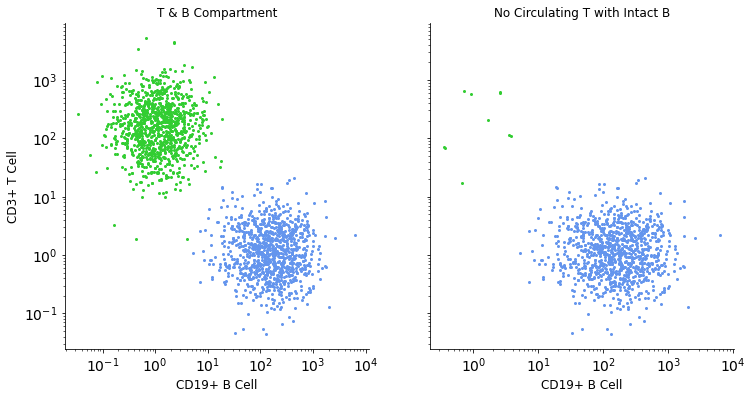

In [4]:
# Generate Fig and Axes objects
fig, ax = plt.subplots(ncols = 2, sharey = True, figsize = (12,6))

# Normal
generate_plot(ax = ax[0], x = cd3_x, y = cd3_y, c = 'limegreen')
generate_plot(ax = ax[0], x = cd19_x, y = cd19_y, c = 'cornflowerblue')

# Diseased
generate_plot(ax = ax[1], x = cd3_x_no, y = cd3_y_no, c = 'limegreen')
generate_plot(ax = ax[1], x = cd19_x, y = cd19_y, c = 'cornflowerblue')

# Plot title
ax[0].set_title('T & B Compartment')
ax[1].set_title('No Circulating T with Intact B')

# Plot axis label
ax[0].set_ylabel('CD3+ T Cell', fontsize = 12)
ax[0].set_xlabel('CD19+ B Cell', fontsize = 12)
ax[1].set_xlabel('CD19+ B Cell', fontsize = 12)

# Show plot
plt.show()

It seems like the default behavior of log-based plot is to use scientific notation, which is fine. However, I find that with log2-based chart, it looked awkward. With log2-based chart, showing 2^4 is less helpful than showing 16. That requires using `ScalarFormatter()`.

For a reason that I do not understand, sometimes `ax.ticklabel_format(style = 'plain', axis = 'y')` is needed (depending on the axis you are styling), but here it is not needed.

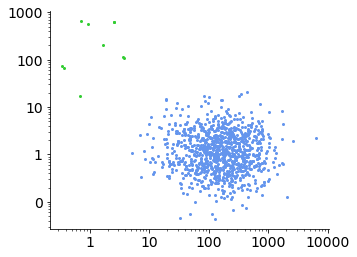

In [5]:
# Generate Fig and Axes objects
fig, ax = plt.subplots(figsize = (5,4))

# Draw the plots
generate_plot(ax = ax, x = cd3_x_no, y = cd3_y_no, c = 'limegreen')
generate_plot(ax = ax, x = cd19_x, y = cd19_y, c = 'cornflowerblue')

# Using ScalarFormatter
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset = False))
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset = False))

Well, what if I want to use "k" notation instead, like 1k for 1000?

With `ticker.FuncFormatter`, a custom (lambda) function is created that accepts `x` and `pos` parameters, where `pos` is the (positional) number of the tick label that is currently being formatted, and the `x` is the actual value to be (pretty) printed. Here, I style it with float notation (`.2f` means 2 decimal places).

I must admit that I do not fully understand how the `.format()` here works, but it works.

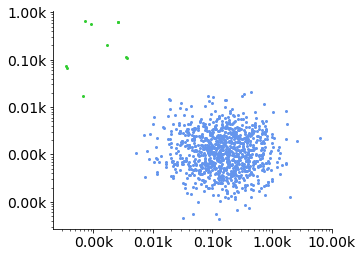

In [6]:
import matplotlib.ticker as ticker

# Generate Fig and Axes objects
fig, ax = plt.subplots(figsize = (5,4))

# Draw the plots
generate_plot(ax = ax, x = cd3_x_no, y = cd3_y_no, c = 'limegreen')
generate_plot(ax = ax, x = cd19_x, y = cd19_y, c = 'cornflowerblue')

# Modify the axis, with lambda function
f = lambda x, pos: '{:,.2f}'.format(x/1000) + 'k'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(f))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(f))